Import Tensorflow

In [1]:
# import tensorflow
import tensorflow as tf

Load MNIST Dataset

In [2]:
# load mnist handwriting digit
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
training_images.shape, training_labels.shape

((60000, 28, 28), (60000,))

Reshape and Normalize the Data

In [4]:
# reshape and normalize the dataset
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

Create Model

In [5]:
# create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Preview Model Summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


Compile and Fit model using Adam Optimizer

In [7]:
# compile and fit model using adam optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=20,  validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 41s 6ms/step - loss: 0.1366 - accuracy: 0.9594 - val_loss: 0.0654 - val_accuracy: 0.9782
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0470 - accuracy: 0.9856 - val_loss: 0.0532 - val_accuracy: 0.9819
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0478 - val_accuracy: 0.9844
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0563 - val_accuracy: 0.9814
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0482 - val_accuracy: 0.9857
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0095 - accuracy: 0.9967 - val_loss: 0.0535 - val_accuracy: 0.9857
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0528 - val_ac

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [9]:
import matplotlib.pyplot as plt

def plot_model_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plot_model_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

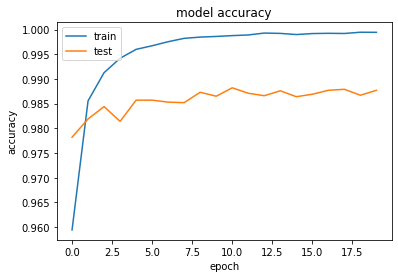

In [10]:
plot_model_acc(history)

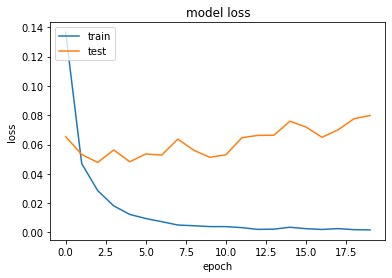

In [11]:
plot_model_loss(history)

Compile and Fit model using SGD Optimizer

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0724 - val_accuracy: 0.9886
Epoch 2/20
1875/1875 [==============================] - 10s 6ms/step - loss: 8.7237e-04 - accuracy: 0.9998 - val_loss: 0.0703 - val_accuracy: 0.9886
Epoch 3/20
1875/1875 [==============================] - 10s 6ms/step - loss: 6.3497e-04 - accuracy: 0.9999 - val_loss: 0.0694 - val_accuracy: 0.9887
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 5.0116e-04 - accuracy: 0.9999 - val_loss: 0.0686 - val_accuracy: 0.9890
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 4.0776e-04 - accuracy: 0.9999 - val_loss: 0.0684 - val_accuracy: 0.9887
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 3.3837e-04 - accuracy: 1.0000 - val_loss: 0.0681 - val_accuracy: 0.9886
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 2.8935e-04 - accuracy: 1.0000 - v

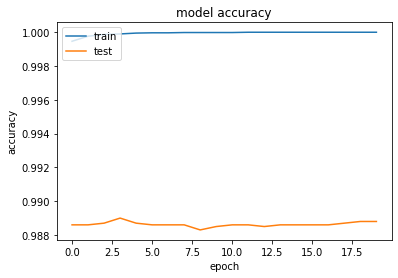

In [12]:
# compile and fit model using SGD optimizer
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=20,  validation_data=(test_images, test_labels))

plot_model_acc(history)

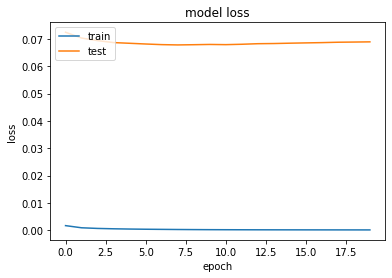

In [13]:
plot_model_loss(history)

Compile and Fit model using RMSprop Optimizer

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0774 - accuracy: 0.9823 - val_loss: 0.1236 - val_accuracy: 0.9786
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0654 - accuracy: 0.9869 - val_loss: 0.1667 - val_accuracy: 0.9788
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0578 - accuracy: 0.9895 - val_loss: 0.1473 - val_accuracy: 0.9802
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0511 - accuracy: 0.9919 - val_loss: 0.1829 - val_accuracy: 0.9825
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0515 - accuracy: 0.9933 - val_loss: 0.2381 - val_accuracy: 0.9843
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0412 - accuracy: 0.9942 - val_loss: 0.2572 - val_accuracy: 0.9826
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0434 - accuracy: 0.9948 - val_loss: 0.3800 - val_ac

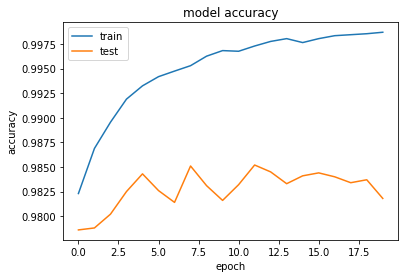

In [14]:
# compile and fit model using adam optimizer
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=20,  validation_data=(test_images, test_labels))

plot_model_acc(history)

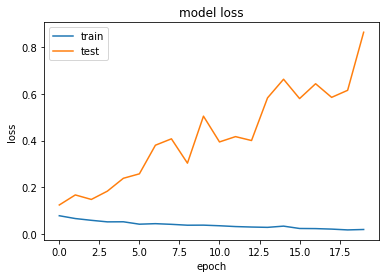

In [15]:
plot_model_loss(history)

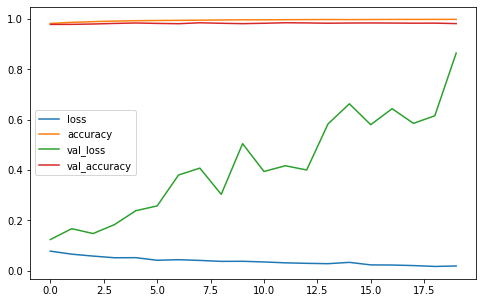

In [16]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()